In [65]:
import numpy as np
import pandas as pd
import tqdm
import re
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [66]:
DFTubarao = pd.read_csv(r'C:\Users\Leonardo\OneDrive\Documentos\GitHub\AtaqueTubarao\attacks.csv', encoding="latin1")

In [67]:
DFTubarao

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
DFTubarao.shape

(25723, 24)

In [69]:
DFTubarao.head(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,...,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,...,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


In [70]:
DFTubarao.describe()

,Year,original order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


In [71]:
DFTubarao.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [72]:
DFTubarao = DFTubarao.loc[:,['Year','Type','Country','Area','Activity','Name','Sex ','Age','Species ','Fatal (Y/N)']]

In [73]:
DFTubarao = DFTubarao.rename({'Sex ': 'Sex'}, axis=1)
DFTubarao = DFTubarao.rename({'Species ': 'Species'}, axis=1)

In [74]:
DFTubarao

,Year,Type,Country,Area,Activity,Name,Sex,Age,Species,Fatal (Y/N)
0,2018.0,Boating,USA,California,Paddling,Julie Wolfe,F,57,White shark,N
1,2018.0,Unprovoked,USA,Georgia,Standing,Adyson McNeely,F,11,NaN,N
2,2018.0,Invalid,USA,Hawaii,Surfing,John Denges,M,48,NaN,N
3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,male,M,NaN,2 m shark,N
4,2018.0,Provoked,MEXICO,Colima,Free diving,Gustavo Ramos,M,NaN,"Tiger shark, 3m",N
...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
DFTubarao_genero = DFTubarao.dropna(subset=['Sex'])

In [76]:
DFTubarao_genero['Sex'].value_counts()

M      5094
F       637
M         2
N         2
lli       1
.         1
Name: Sex, dtype: int64

In [77]:
DFTubarao_genero['Sex'].unique()

array(['F', 'M', 'M ', 'lli', 'N', '.'], dtype=object)

In [78]:
mask_genero = DFTubarao_genero[DFTubarao_genero['Sex'].str.contains('M ')]
mask_genero

,Year,Type,Country,Area,Activity,Name,Sex,Age,Species,Fatal (Y/N)
563,2014.0,Unprovoked,USA,Florida,Swimming,male,M,42,NaN,N
1587,2005.0,Unprovoked,AUSTRALIA,Queensland,Spearfishing,Ben Edelstein,M,NaN,Blacktip shark,N


In [79]:
DFTubarao_genero.loc[:,'Sex'] = DFTubarao_genero.loc[:,'Sex'].str.replace('M ','M', regex=True)
DFTubarao_genero

C:\Users\Leonardo\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Year,Type,Country,Area,Activity,Name,Sex,Age,Species,Fatal (Y/N)
0,2018.0,Boating,USA,California,Paddling,Julie Wolfe,F,57,White shark,N
1,2018.0,Unprovoked,USA,Georgia,Standing,Adyson McNeely,F,11,NaN,N
2,2018.0,Invalid,USA,Hawaii,Surfing,John Denges,M,48,NaN,N
3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,male,M,NaN,2 m shark,N
4,2018.0,Provoked,MEXICO,Colima,Free diving,Gustavo Ramos,M,NaN,"Tiger shark, 3m",N
...,...,...,...,...,...,...,...,...,...,...
6297,0.0,Unprovoked,AUSTRALIA,Western Australia,Diving,male,M,NaN,NaN,Y
6298,0.0,Unprovoked,AUSTRALIA,Western Australia,Pearl diving,Ahmun,M,NaN,NaN,Y
6299,0.0,Unprovoked,USA,North Carolina,Swimming,Coast Guard personnel,M,NaN,NaN,Y
6300,0.0,Unprovoked,PANAMA,NaN,NaN,Jules Patterson,M,NaN,NaN,Y


In [80]:
DFTubarao_genero['Sex'].value_counts()

M      5096
F       637
N         2
lli       1
.         1
Name: Sex, dtype: int64

In [81]:
DFTubarao_genero = DFTubarao_genero.drop(DFTubarao_genero[DFTubarao_genero['Sex'].isin(['lli','N','.'])].index)
DFTubarao_genero['Sex'].value_counts()

M    5096
F     637
Name: Sex, dtype: int64

In [82]:
DFTubarao_genero['Sex'].value_counts(normalize=True)

M    0.888889
F    0.111111
Name: Sex, dtype: float64

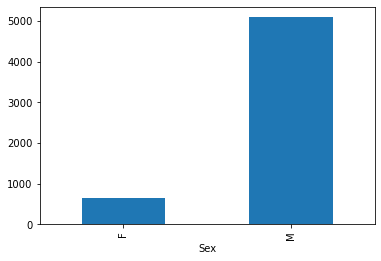

In [83]:
%matplotlib inline

DFTubarao_genero.groupby(['Sex']).Sex.count().plot(kind='bar')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')


In [84]:
DFTubarao = DFTubarao_genero

In [85]:
DFTubarao

,Year,Type,Country,Area,Activity,Name,Sex,Age,Species,Fatal (Y/N)
0,2018.0,Boating,USA,California,Paddling,Julie Wolfe,F,57,White shark,N
1,2018.0,Unprovoked,USA,Georgia,Standing,Adyson McNeely,F,11,NaN,N
2,2018.0,Invalid,USA,Hawaii,Surfing,John Denges,M,48,NaN,N
3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,male,M,NaN,2 m shark,N
4,2018.0,Provoked,MEXICO,Colima,Free diving,Gustavo Ramos,M,NaN,"Tiger shark, 3m",N
...,...,...,...,...,...,...,...,...,...,...
6297,0.0,Unprovoked,AUSTRALIA,Western Australia,Diving,male,M,NaN,NaN,Y
6298,0.0,Unprovoked,AUSTRALIA,Western Australia,Pearl diving,Ahmun,M,NaN,NaN,Y
6299,0.0,Unprovoked,USA,North Carolina,Swimming,Coast Guard personnel,M,NaN,NaN,Y
6300,0.0,Unprovoked,PANAMA,NaN,NaN,Jules Patterson,M,NaN,NaN,Y


In [86]:
DFTubarao['Year'].dtypes

dtype('float64')

In [87]:
DFTubarao['Year'].unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [88]:
DFTubarao = DFTubarao.dropna(subset=['Year'])
DFTubarao['Year'].unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895., 1894.,
       1893., 1892.,

In [89]:
DFTubarao['Year'] < 1950

0       False
1       False
2       False
3       False
4       False
        ...  
6297     True
6298     True
6299     True
6300     True
6301     True
Name: Year, Length: 5731, dtype: bool

In [90]:
DFTubarao = DFTubarao.drop(DFTubarao[DFTubarao['Year'] < 1950].index)
DFTubarao

,Year,Type,Country,Area,Activity,Name,Sex,Age,Species,Fatal (Y/N)
0,2018.0,Boating,USA,California,Paddling,Julie Wolfe,F,57,White shark,N
1,2018.0,Unprovoked,USA,Georgia,Standing,Adyson McNeely,F,11,NaN,N
2,2018.0,Invalid,USA,Hawaii,Surfing,John Denges,M,48,NaN,N
3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,male,M,NaN,2 m shark,N
4,2018.0,Provoked,MEXICO,Colima,Free diving,Gustavo Ramos,M,NaN,"Tiger shark, 3m",N
...,...,...,...,...,...,...,...,...,...,...
4492,1950.0,Unprovoked,PANAMA,Canal Zone,Bathing,"male, a US soldier",M,NaN,2.7 m [9'] shark with black-tipped pectoral fins,N
4494,1950.0,Unprovoked,SINGAPORE,Singapore Harbor,Diving for coins,"Abdullah, a Malay diver",M,NaN,NaN,Y
4495,1950.0,Unprovoked,NEW CALEDONIA,North Province,"Spearfishing, but walking carrying fish on end...",male,M,NaN,NaN,N
4496,1950.0,Unprovoked,NEW CALEDONIA,North Province,"Helmet diving, collecting trochus shell",male,M,NaN,NaN,N


In [91]:
DFTubarao['Year'] = DFTubarao['Year'].astype(int)

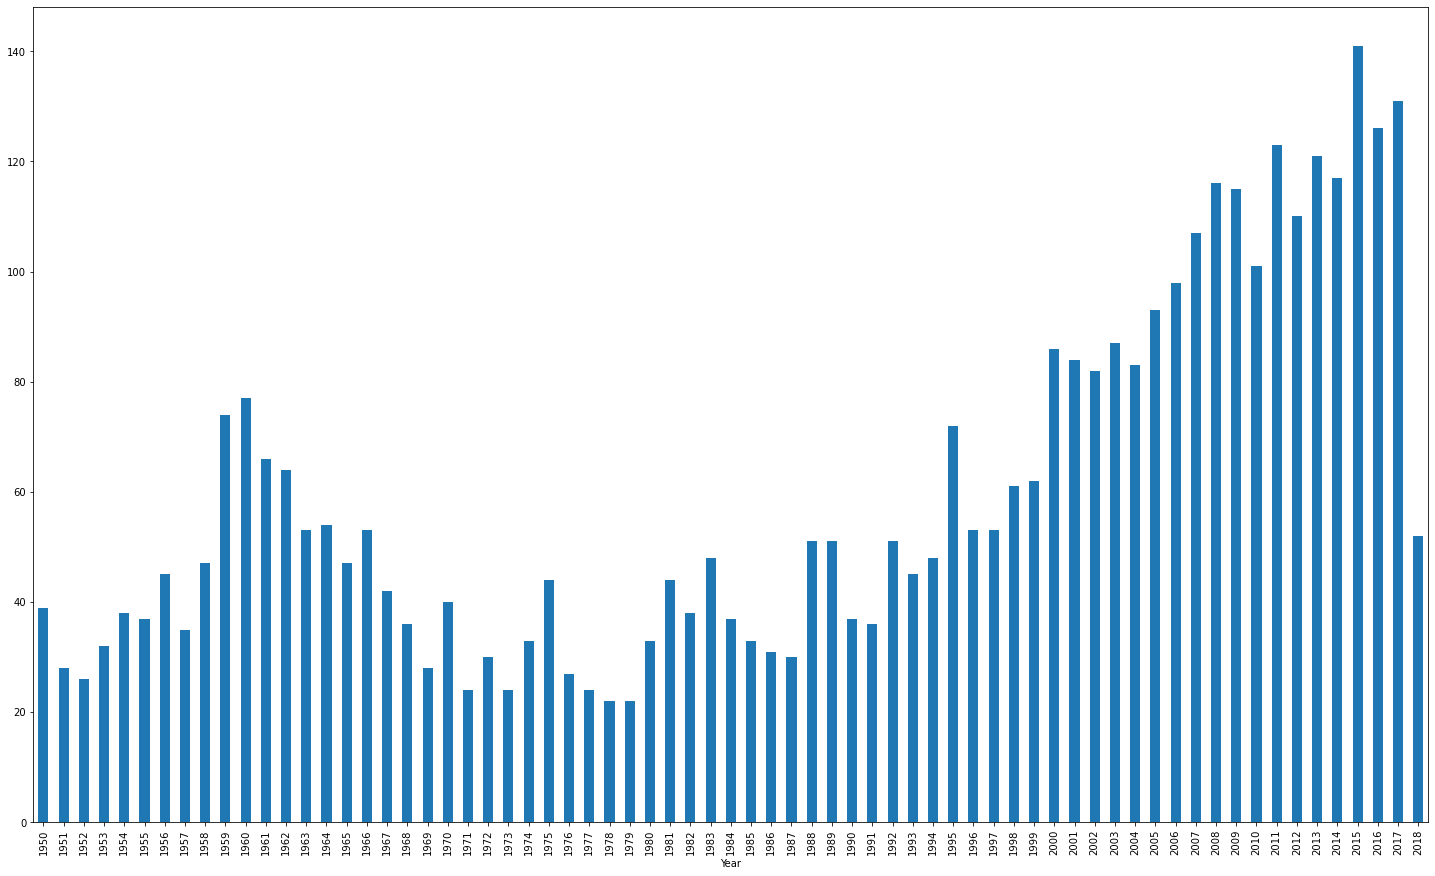

In [92]:
%matplotlib inline

DFTubarao.groupby(['Year']).Year.count().plot(figsize=(25, 15),kind='bar')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')


In [93]:
DFTubarao['Year'].value_counts(normalize=True).head(5)

2015    0.034407
2017    0.031967
2016    0.030747
2011    0.030015
2013    0.029527
Name: Year, dtype: float64

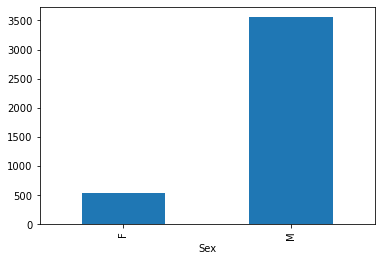

In [94]:
%matplotlib inline

DFTubarao.groupby(['Sex']).Sex.count().plot(kind='bar')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')


In [95]:
DFTubarao['Sex'].value_counts(normalize=True)

M    0.868228
F    0.131772
Name: Sex, dtype: float64

In [96]:
DFTubarao['Country'] = DFTubarao['Country'].apply(lambda x : re.sub('.*[UuEe][SsUu][Aa].*', 'USA',x) if isinstance(x,str) else np.nan)

In [97]:
DFTubarao['Country'] = DFTubarao['Country'].apply(lambda x : re.sub('.*[Aa][Us][Ss][Tt][Rr][Aa][Ll][Ii][Aa].*', 'AUSTRALIA',x) if isinstance(x,str) else np.nan)

In [98]:
DFTubarao['Country'] = DFTubarao['Country'].apply(lambda x : re.sub('.*[Ss][Oo][Uu][Tt][Hh] [Aa][Ff][Rr][Ii][Cc][Aa].*', 'SOUTH AFRICA',x) if isinstance(x,str) else np.nan)

In [99]:
DFTubarao['Country'] = DFTubarao['Country'].apply(lambda x : re.sub('.*[Pp][Aa][Pp][Uu][Aa] [Nn][Ee][Ww] [Gg][Uu][Ii][Nn][Ee][Aa].*', 'PAPUA NEW GUINEA',x) if isinstance(x,str) else np.nan)

In [100]:
DFTubarao['Country'] = DFTubarao['Country'].apply(lambda x : re.sub('.*[Bb][Rr][Aa][ZzSs][Ii][Ll].*', 'BRAZIL',x) if isinstance(x,str) else np.nan)

In [101]:
DFTubarao['Country'] = DFTubarao['Country'].apply(lambda x : re.sub('.*BAHAMAS.*', 'BAHAMAS',x) if isinstance(x,str) else np.nan)

In [102]:
DFTubarao['Country'] = DFTubarao['Country'].apply(lambda x : re.sub('.*[Mm][Ee][Xx][Ii][Cc][Oo].*', 'MEXICO',x) if isinstance(x,str) else np.nan)

In [103]:
DFTubarao['Country'] = DFTubarao['Country'].apply(lambda x : re.sub('.*UNITED ARAB EMIRATES.*', 'UNITED ARAB EMIRATES',x) if isinstance(x,str) else np.nan)

In [104]:
DFTubarao['Country'] = DFTubarao['Country'].apply(lambda x : re.sub('.*PACIFIC OCEAN.*', 'PACIFIC OCEAN',x) if isinstance(x,str) else np.nan)

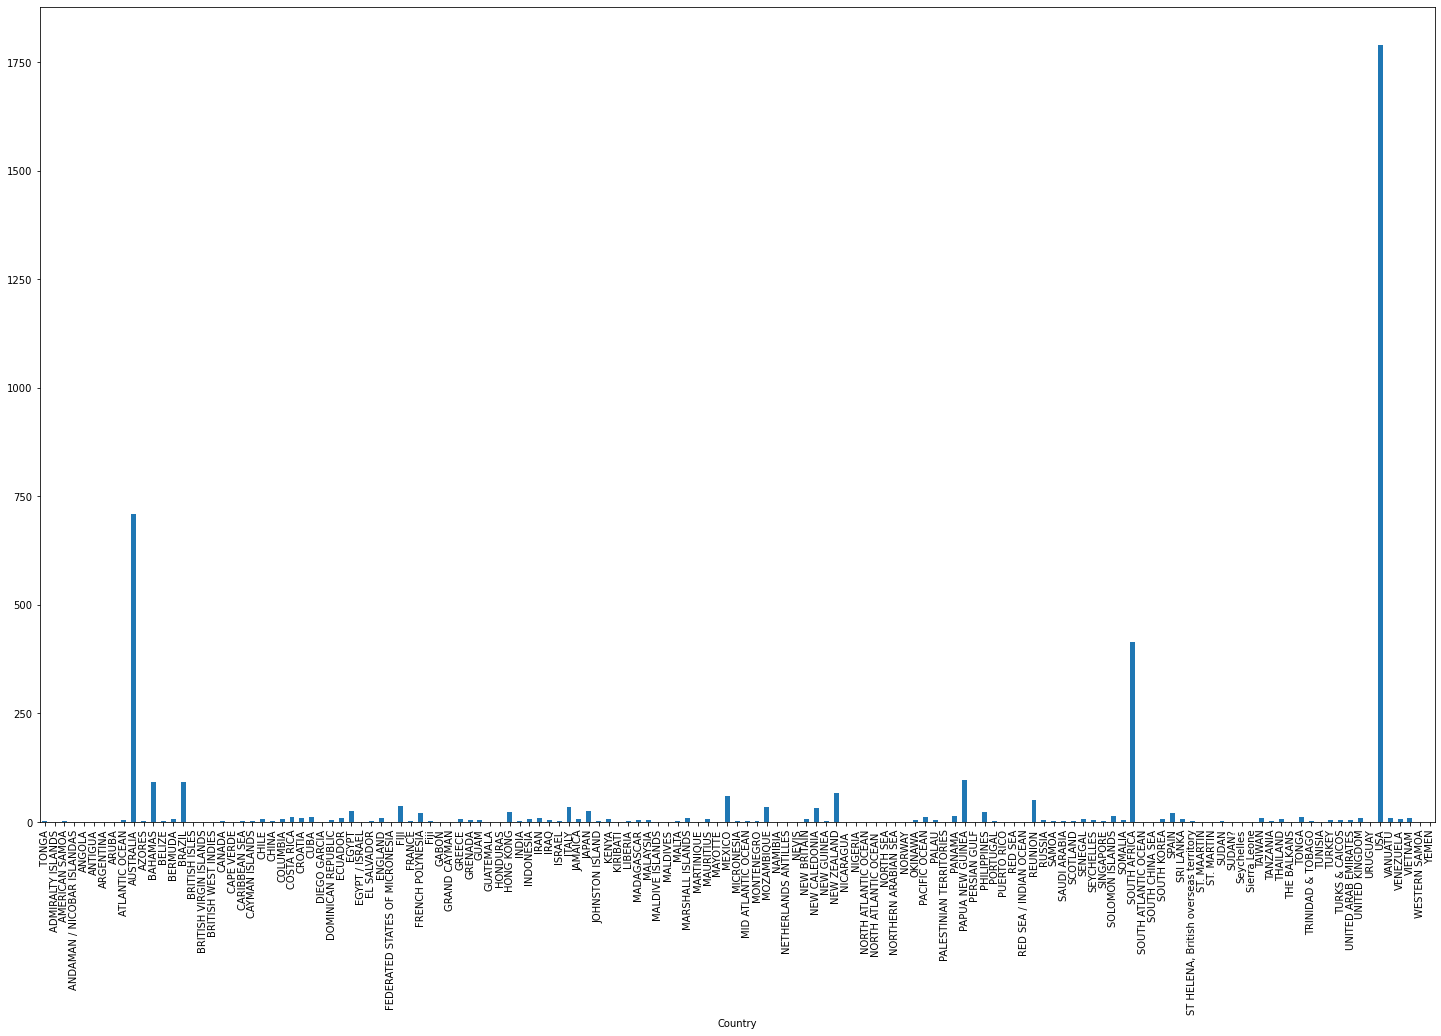

In [105]:
DFTubarao.groupby(['Country']).Country.count().plot(figsize=(25, 15),kind='bar')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')

In [106]:
DFTubarao['Country'].value_counts(normalize=True).head(6)

USA                 0.437592
AUSTRALIA           0.173519
SOUTH AFRICA        0.101566
PAPUA NEW GUINEA    0.023495
BAHAMAS             0.022516
BRAZIL              0.022516
Name: Country, dtype: float64

In [107]:
x = DFTubarao['Country'].value_counts(normalize=True).head(6)

<AxesSubplot:>

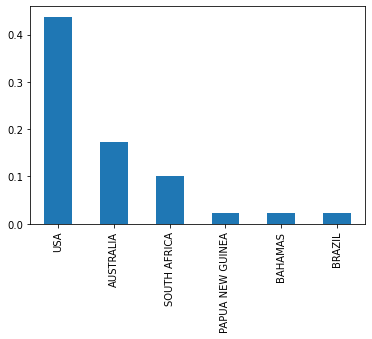

In [108]:
x.plot(kind = 'bar')

In [109]:
DFTubarao['Activity'] = DFTubarao['Activity'].apply(lambda x : re.sub('.*[Ss]urfing.*', 'Surfing',x) if isinstance(x,str) else np.nan)

In [110]:
DFTubarao['Activity'] = DFTubarao['Activity'].apply(lambda x : re.sub('.*[Ss]urf.*', 'Surfing',x) if isinstance(x,str) else np.nan)

In [111]:
DFTubarao['Activity'] = DFTubarao['Activity'].apply(lambda x : re.sub('.*[Dd]iving.*', 'Diving',x) if isinstance(x,str) else np.nan)

In [112]:
DFTubarao['Activity'] = DFTubarao['Activity'].apply(lambda x : re.sub('.*[Ff]ishing.*', 'Fishing',x) if isinstance(x,str) else np.nan)

In [113]:
DFTubarao['Activity'] = DFTubarao['Activity'].apply(lambda x : re.sub('.*[Ss]wimming.*', 'Swimming',x) if isinstance(x,str) else np.nan)

In [114]:

DFTubarao['Activity'] = DFTubarao['Activity'].apply(lambda x : re.sub('.*[Bb]oarding.*', 'Boarding',x) if isinstance(x,str) else np.nan)

In [115]:
DFTubarao['Activity'] = DFTubarao['Activity'].apply(lambda x : re.sub('.*[Ww]ading.*', 'Wading',x) if isinstance(x,str) else np.nan)

In [116]:
DFTubarao['Activity'].value_counts(normalize=True, ascending=False).head(5)

Surfing     0.307931
Fishing     0.185998
Swimming    0.166365
Diving      0.096358
Boarding    0.036425
Name: Activity, dtype: float64

In [117]:
DFTubarao['Activity'].value_counts(normalize=True).head(5).sum()

0.7930767243606303

In [118]:
x = DFTubarao['Activity'].value_counts(normalize=True, ascending=False).head(5)

<AxesSubplot:>

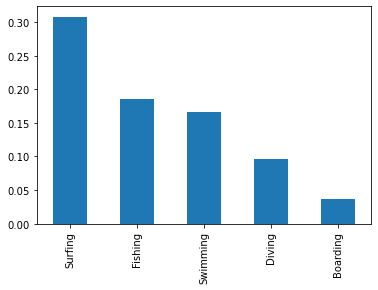

In [119]:
x.plot(kind = "bar")